# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [1]:
# WRITE YOUR CODE HERE
set.seed(2023)
cols <- c("x","𝜖", "Y")
sim_dat = data.frame(matrix(nrow = 100, ncol = length(cols))) 
colnames(sim_dat) = cols

sim_dat[,1] <- rnorm(100, 50, 10)
sim_dat[,2] <- rnorm(100, 5, 2)
sim_dat[,3] <- 30 + (0.5*sim_dat[,1]) + (2*sim_dat[,1]^2) + (0.3*sim_dat[,1]^3) + sim_dat[,2]

head(sim_dat)
dim(sim_dat)



,x,𝜖,Y
,<dbl>,<dbl>,<dbl>
1,49.16216,5.158027,40539.84
2,40.17056,4.781517,22728.87
3,31.24933,6.811050,11160.16
4,48.13855,6.950749,38161.40
5,43.66514,6.886166,28848.18
6,60.90797,4.966054,75271.56


[1] 100   3

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [3]:
# WRITE YOUR CODE HERE
#install.packages("tidyverse")
install.packages("leaps")
library(tidyverse)
library(leaps)

#only way I could find to get around an error I kept getting: "attempt to set 'colnames' on an object with less than two dimensions"
sim_dat <- sim_dat %>%
  select(x, Y) %>%
  mutate(x2 = x^2) %>%
  mutate(x3 = x^3) %>%
  mutate(x4 = x^4) %>%
  mutate(x5 = x^5) %>%
  mutate(x6 = x^6) %>%
  mutate(x7 = x^7) %>%
  mutate(x8 = x^8) %>%
  mutate(x9 = x^9) %>%
  mutate(x10 = x^10)
 head(sim_dat)

regfit.full = regsubsets(x = Y~., data = sim_dat, nvmax=10)
reg.summary <- summary(regfit.full)
print(reg.summary)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,x,Y,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49.16216,40539.84,2416.9176,118820.88,5841490.8,287180285,14118402109,6.940911e+11,3.412301e+13,1.677561e+15,8.247252e+16
2,40.17056,22728.87,1613.6741,64822.20,2603944.1,104601899,4201917117,1.687934e+11,6.780525e+12,2.723775e+14,1.094156e+16
3,31.24933,11160.16,976.5204,30515.61,953592.1,29799112,931202201,2.909944e+10,9.093380e+11,2.841620e+13,8.879871e+14
4,48.13855,38161.40,2317.3203,111552.45,5369973.5,258502755,12443948674,5.990337e+11,2.883662e+13,1.388153e+15,6.682367e+16
5,43.66514,28848.18,1906.6447,83253.91,3635294.1,158735635,6931214223,3.026525e+11,1.321536e+13,5.770507e+14,2.519700e+16
6,60.90797,75271.56,3709.7814,225955.27,13762477.8,838244652,51055784000,3.109704e+12,1.894058e+14,1.153632e+16,7.026541e+17


Subset selection object
Call: regsubsets.formula(x = Y ~ ., data = sim_dat, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  " " "*" "*" " " " " " " " " " " " " "*"
4  ( 1 )  "*" " " "*" "*" "*" " " " " " " " " " "
5  ( 1 )  "*" " " "*" "*" "*" " " "*" " " " " " "
6  ( 1 )  " " "*" " " "*" "*" "*" "*" "*" " " " "
7  ( 1 )  " " "*" " " " " "*" "*" "*" "*" "*" "*"
8  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" "*" "*"
9  ( 1 )  " " "*" "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

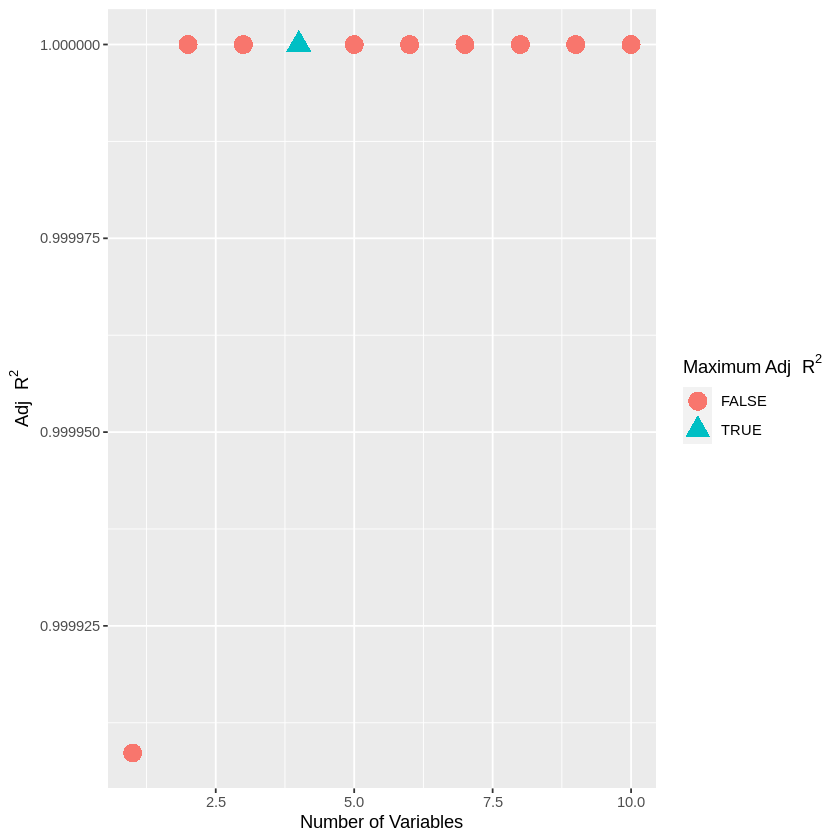

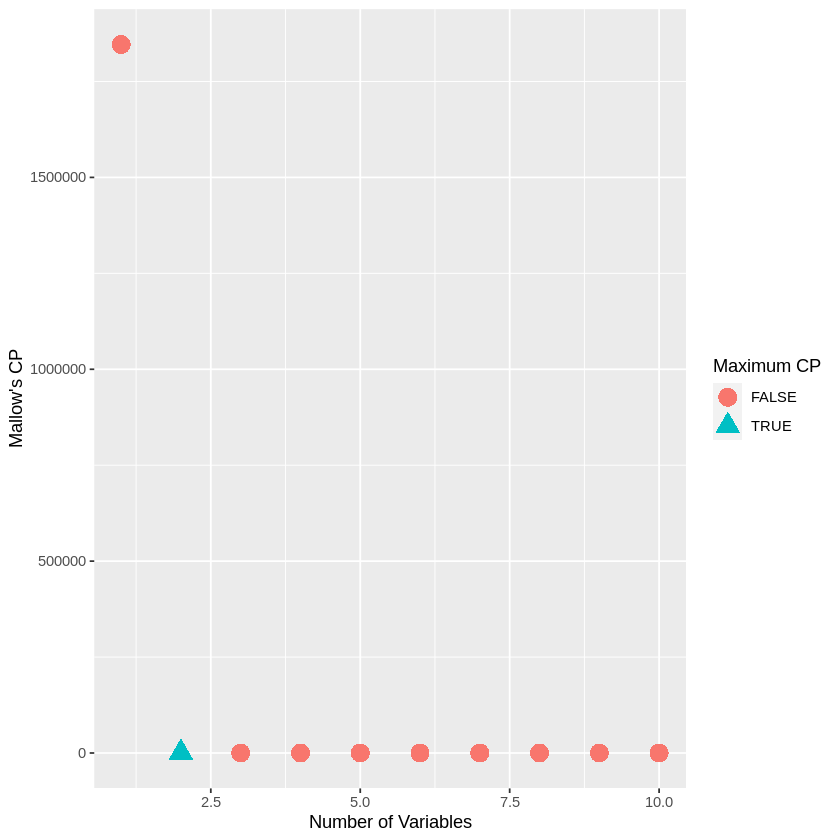


Call:  glm(formula = Y ~ x2 + x3, data = sim_dat)

Coefficients:
(Intercept)           x2           x3  
     45.460        2.008        0.300  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    7.373e+10 
Residual Deviance: 339.4 	AIC: 414


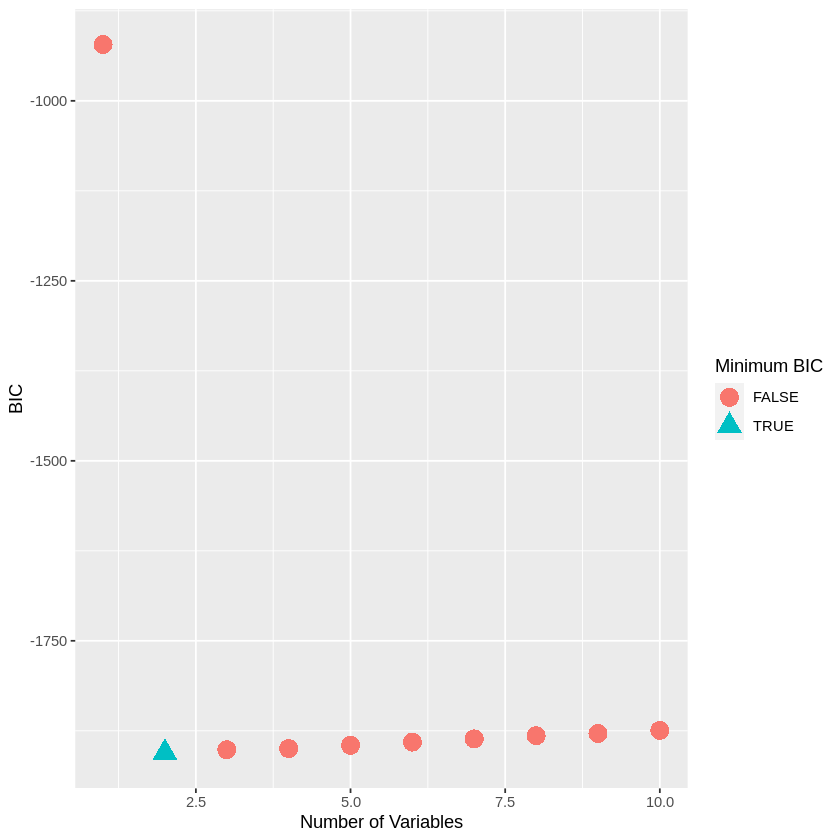

In [4]:
# WRITE YOUR CODE HERE
numvar = 1:length(reg.summary$adjr2)
allfalse = rep(FALSE,length(reg.summary$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")


model <- glm(Y~x2+x3, data=sim_dat)
print(model)



> *Write your response here* 

> The 2-feature model seems to be the best, as it has the lowest Mallow's CP and BIC and an adjusted r squared of 1. The model has an intercept of 45.460, the coefficients for x2 and x3 are 2.008 and 0.3 respectively.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., sim_dat, nvmax = 10, method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  " " "*" "*" " " " " " " " " " " " " "*"
4  ( 1 )  " " "*" "*" " " " " " " " " " " "*" "*"
5  ( 1 )  "*" "*" "*" " " " " " " " " " " "*" "*"
6  ( 1 )  "*" "*" "*" "*" " " " " " " " " "*" "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " " " "*" "*"
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

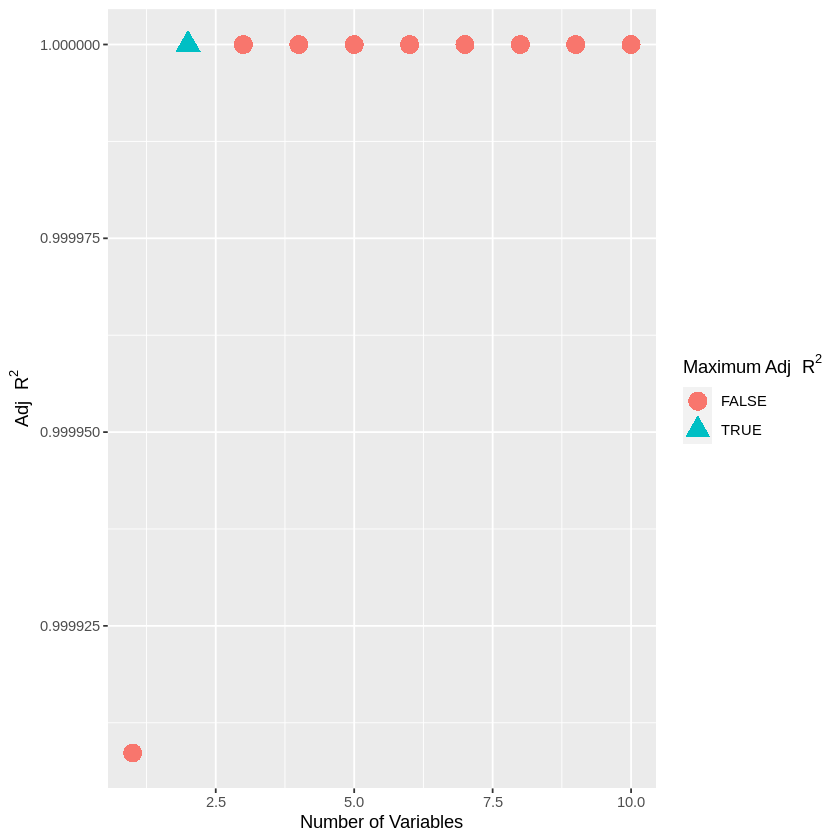

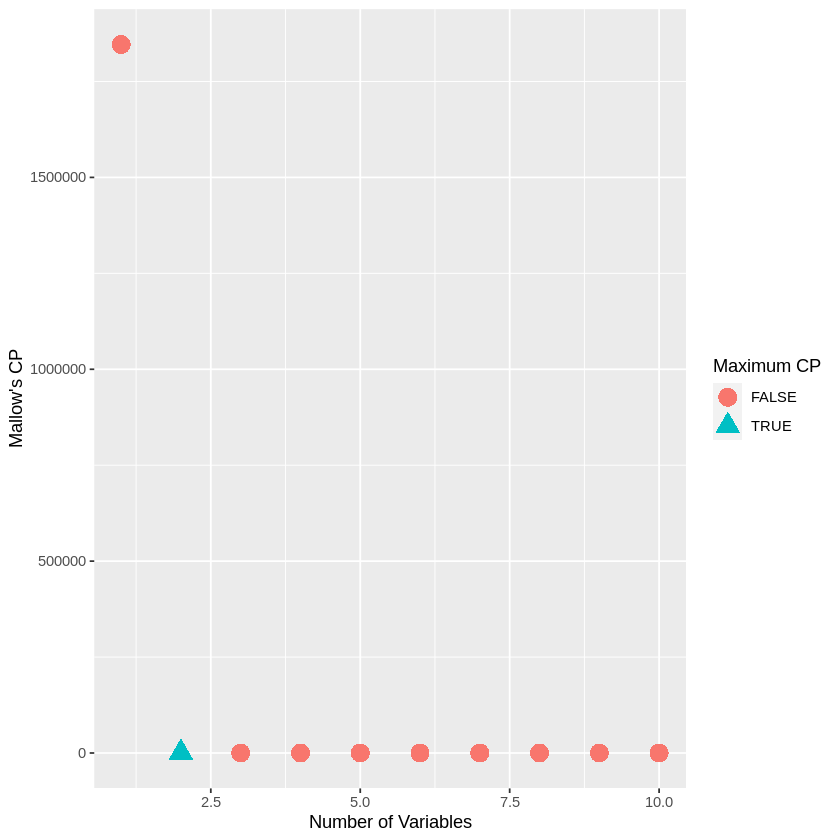


Call:  glm(formula = Y ~ x2 + x3, data = sim_dat)

Coefficients:
(Intercept)           x2           x3  
     45.460        2.008        0.300  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    7.373e+10 
Residual Deviance: 339.4 	AIC: 414


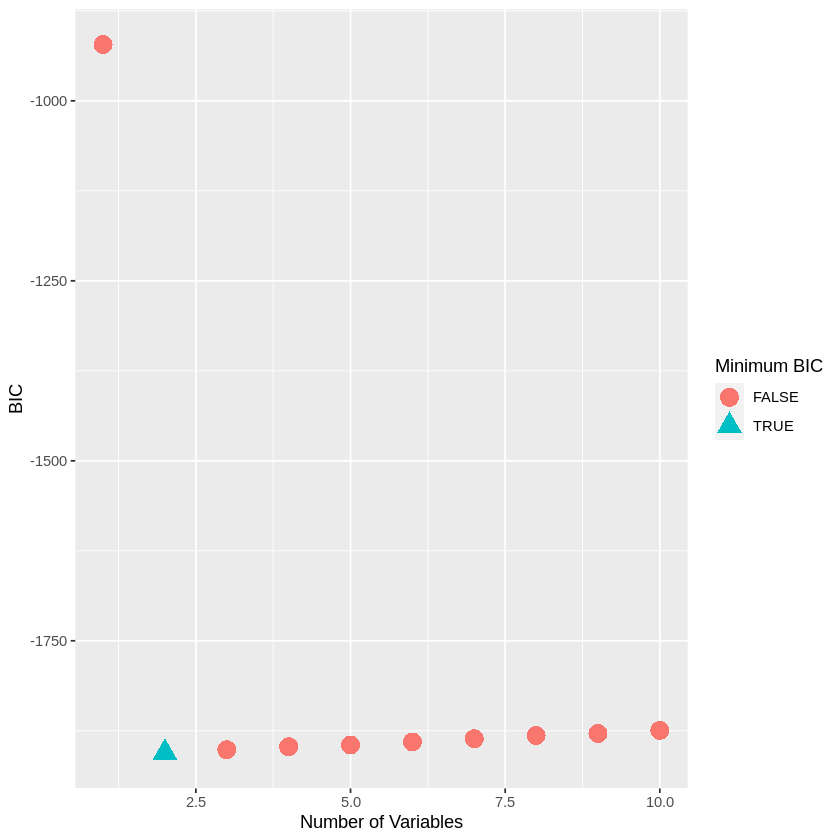

In [5]:
# WRITE YOUR CODE HERE
regfit_fwd = regsubsets(Y~., sim_dat, nvmax=10, method = "forward")
reg.summary_fwd <- summary(regfit_fwd)
print(reg.summary_fwd)

numvar = 1:length(reg.summary_fwd$adjr2)
allfalse = rep(FALSE,length(reg.summary_fwd$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary_fwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary_fwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary_fwd$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary_fwd$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary_fwd$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary_fwd$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

  
model <- glm(Y~x2+x3, data=sim_dat)
print(model)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., sim_dat, nvmax = 10, method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" "*" " " " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" "*" " " " " " " " " " "
4  ( 1 )  " " " " "*" "*" "*" "*" " " " " " " " "
5  ( 1 )  " " " " "*" "*" "*" "*" "*" " " " " " "
6  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" " " " "
7  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" "*" " "
8  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" "*" "*"
9  ( 1 )  " " "*" "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "

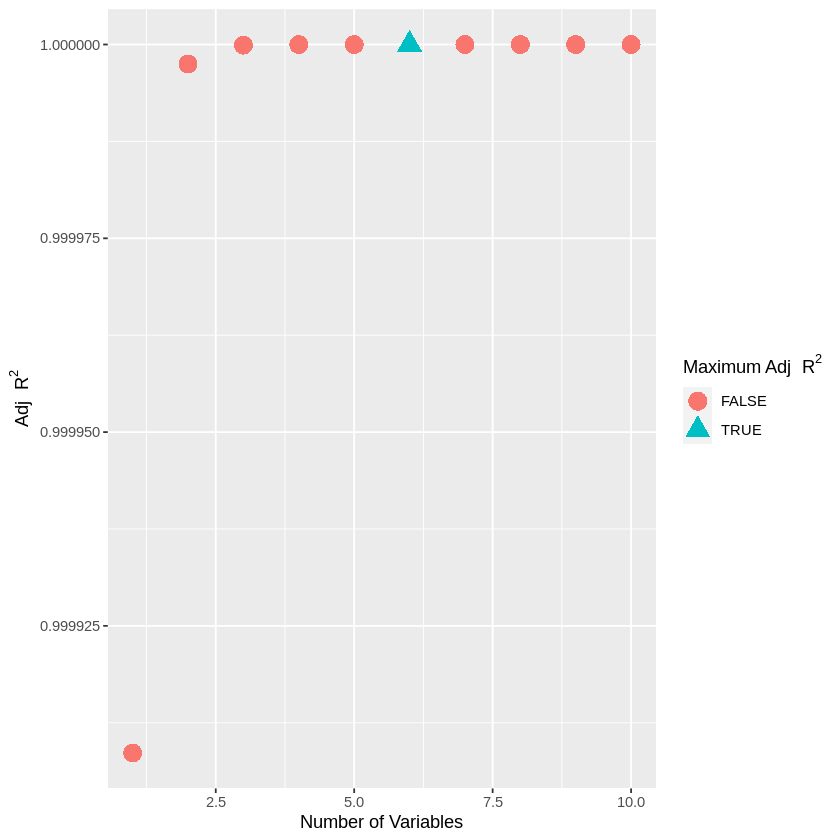

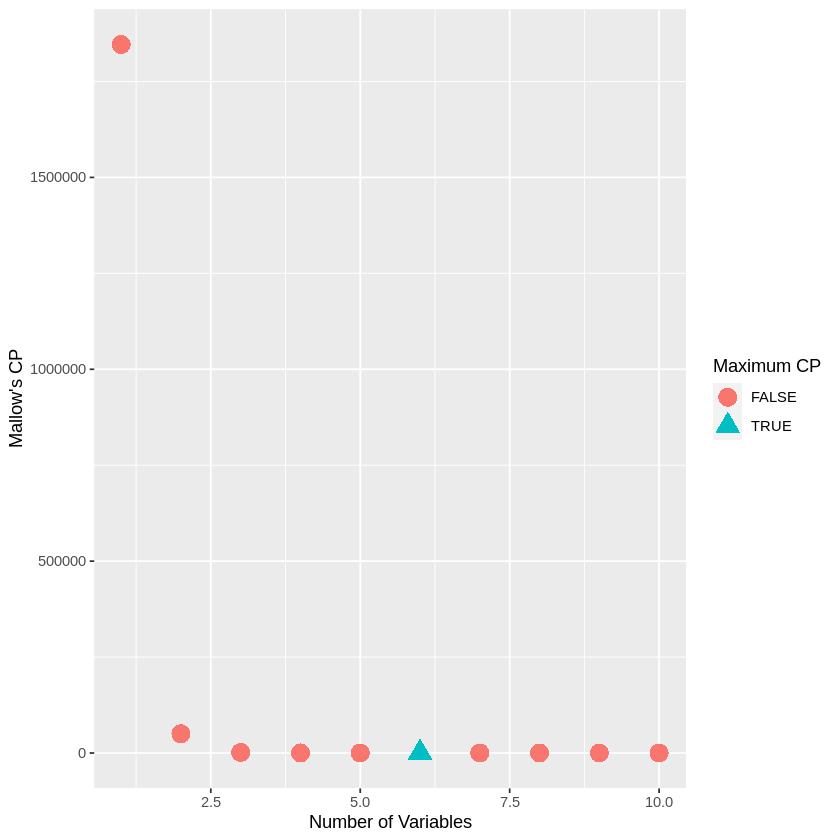


Call:  glm(formula = Y ~ x3 + x4 + x5 + x6 + x7 + x8, data = sim_dat)

Coefficients:
(Intercept)           x3           x4           x5           x6           x7  
  1.753e+02    4.765e-01   -7.006e-03    1.529e-04   -1.896e-06    1.254e-08  
         x8  
 -3.438e-11  

Degrees of Freedom: 99 Total (i.e. Null);  93 Residual
Null Deviance:	    7.373e+10 
Residual Deviance: 330.8 	AIC: 419.4


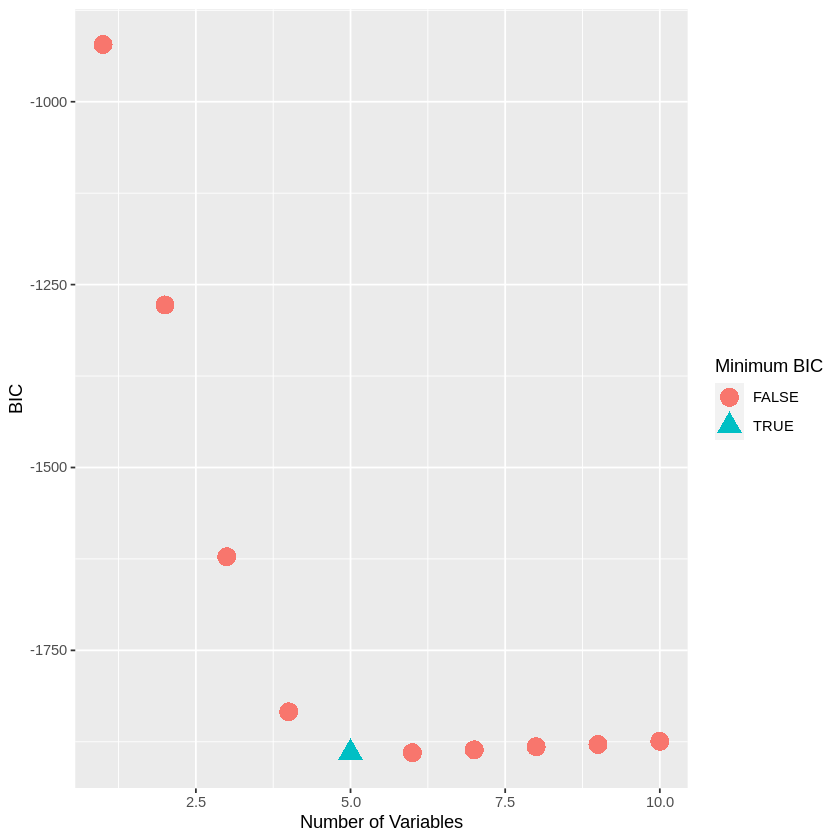

In [6]:
# WRITE YOUR CODE HERE
regfit_bwd = regsubsets(Y~., sim_dat, nvmax=10, method = "backward")
reg.summary_bwd <- summary(regfit_bwd)
print(reg.summary_bwd)

numvar = 1:length(reg.summary_bwd$adjr2)
allfalse = rep(FALSE,length(reg.summary_bwd$adjr2))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary_bwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary_bwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary_bwd$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary_bwd$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=5) + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary_bwd$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary_bwd$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=5) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")
  
model <- glm(Y~x3+x4+x5+x6+x7+x8, data=sim_dat)
print(model)


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here* 

> The results of the forward stepwise selection are the same as the results from part 1 -- the 2-feature model including x2 and x3 performs the best, meaning that it also has the same coefficients as part 1. The backward stepwise selection had different results -- the 6 feature model performs the best in this case, which includes features x3, x4, x5, x6, x7, x8. The model has an intercept of 1.753e+02 and coefficients for x3-x8 of 4.765e-01, -7.006e-03, 1.529e-04, -1.896e-06, 1.254e-08, and -3.438e-11 respectively.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [18]:
# WRITE YOUR CODE HERE
set.seed(2023)

sim_dat_2 = data.frame(matrix(nrow = 1000, ncol = 21))
colnames(sim_dat_2) = c("x", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "y") 

x <- rnorm(1000, 0, 50)
beta <- sample(x=c(-50:50), size=1000, replace=TRUE)
print(0 %in% beta)
𝜖 <- rnorm(1000, 5, 2)
y <- x*beta + 𝜖

sim_dat_2[,1] <- x
sim_dat_2[,21] <- y

#fill in the rest of the features
for (i in 2:20) {
  x <- rnorm(1000, 0, sample(1:20, size=1))
  sim_dat_2[,i] <- x
}

head(sim_dat_2)

train <- sim_dat_2[1:100,]
test <- sim_dat_2[101:1000,]


[1] TRUE


,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.189218,-0.6085383,-5.052252,-12.8104703,-10.281678,-0.6570364,4.4885063,2.244386,-2.51316473,3.857570,⋯,-4.932771,-3.04315791,-8.330843,6.3991910,2.6553847,7.767564,9.797024,-14.4118807,-0.2597450,-206.33297
2,-49.147187,-5.0957571,-11.900845,1.7833012,7.480047,1.9938973,0.5274953,5.124147,2.83330626,3.239956,⋯,-3.564492,1.44413777,-11.323437,5.9136071,2.1742794,34.299970,12.238754,-0.6697492,0.1576798,-2404.58139
3,-93.753366,-0.3189741,-2.028956,0.6432346,12.844350,-0.2134240,2.2662042,6.964533,-0.89108337,9.354132,⋯,4.496518,-1.23115533,1.626272,0.4401667,0.5821804,-16.408213,-3.482888,18.2019219,3.1843306,1974.74518
4,-9.307233,-2.1749605,1.539874,6.9801805,14.707528,23.3754524,-5.7503440,1.256284,-0.07433227,6.869641,⋯,3.424950,-1.46625954,-8.454352,-6.2848032,-0.1160667,43.650349,17.309462,8.6358509,0.4657250,43.11905
5,-31.674285,1.2736723,9.974690,3.4747916,-35.405307,-4.7574162,-16.0161429,-13.808716,-0.23704442,-9.329829,⋯,-1.308448,2.70024698,14.192763,-8.2878560,0.4052736,-28.203720,4.100332,-8.6734980,-0.7349005,-1420.35067
6,54.539873,-1.2095047,18.758618,-3.2732376,23.800938,-5.8852691,11.2365109,-18.519771,0.45556750,-3.237807,⋯,2.709898,-0.06090972,7.401908,-4.1363410,1.0082034,-14.634827,1.058920,-4.8975286,2.4406546,1694.82673


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(x = y ~ ., data = train)
20 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 ) "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 ) "*" " " " " " " " " " " " " " " " " " " " " " " "*" " " " " " " " "
3  ( 1 ) "*" " " " " " " " " " " " " " " " " " " " " " " "*" " " " " " " "*"


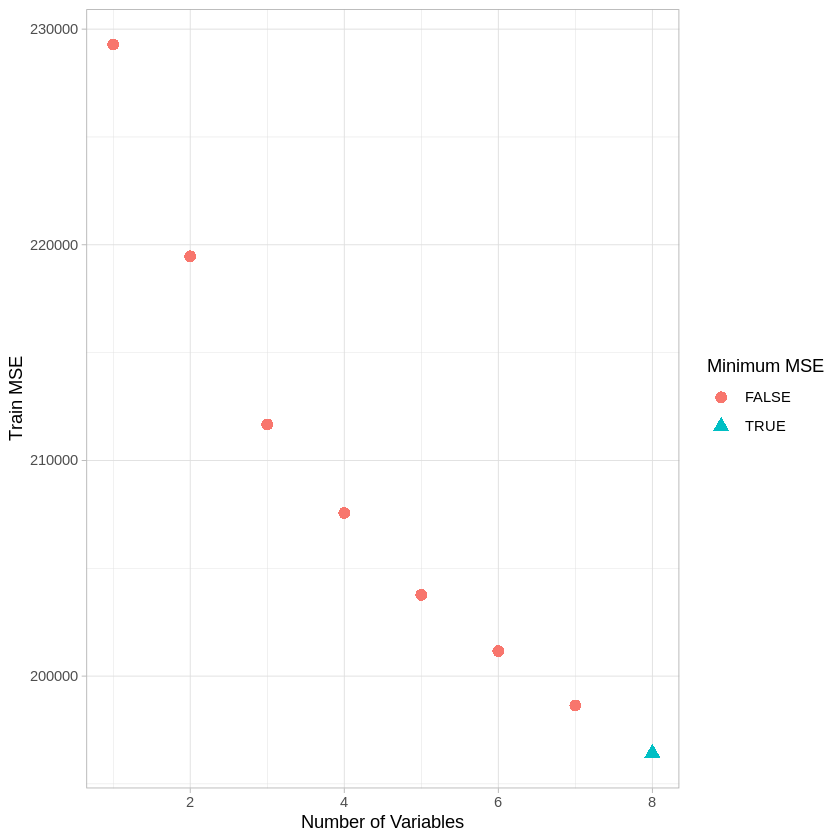

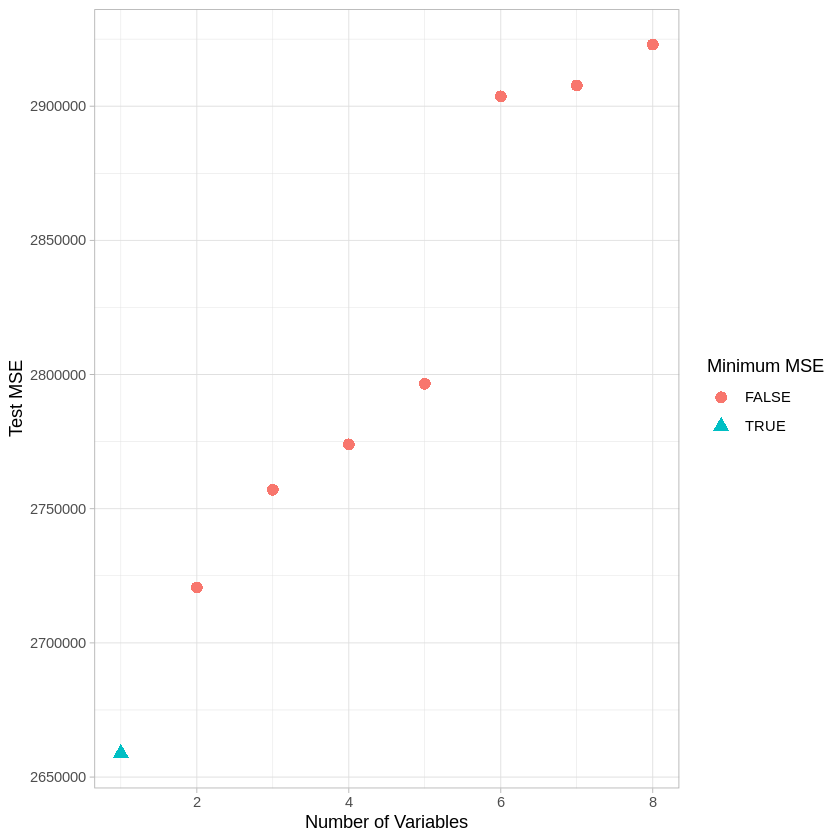

In [25]:
# WRITE YOUR CODE HERE
regfit.train = regsubsets(x = y~., data = train)
reg.summary <- summary(regfit.train)
print(reg.summary)

numvar = 1:length(reg.summary$rss)
allfalse = rep(FALSE,length(reg.summary$rss))

mse.df <- data.frame(numvar = numvar, mse = reg.summary$rss/1000, minmse = allfalse)
mse.df$minmse[which.min(reg.summary$rss/1000)] <- TRUE
ggplot(mse.df,aes(x=numvar,y=mse,shape=minmse,col=minmse)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Train MSE", color="Minimum MSE", shape="Minimum MSE")

test_mat = model.matrix (y~., data = test)
val_errors = rep(NA,length(reg.summary$rss))

for(i in 1:length(reg.summary$rss)){    
    coefi = coef(regfit.train, id = i)   
    pred = test_mat[,names(coefi)]%*%coefi   
    val_errors[i] = mean((test$y-pred)^2)
}

min = which.min(val_errors)

msetest.df <- data.frame(numvar = numvar, mse = val_errors, minmse = allfalse)
msetest.df$minmse[min] <- TRUE
ggplot(msetest.df,aes(x=numvar,y=mse,shape=minmse,col=minmse)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Test MSE", color="Minimum MSE", shape="Minimum MSE")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [26]:
# WRITE YOUR CODE HERE
model <- glm(y~x, data=sim_dat_2)
print(model)



Call:  glm(formula = y ~ x, data = sim_dat_2)

Coefficients:
(Intercept)            x  
    -20.850        1.148  

Degrees of Freedom: 999 Total (i.e. Null);  998 Residual
Null Deviance:	    2.532e+09 
Residual Deviance: 2.529e+09 	AIC: 17590


> *Write your response here* 

> The best model according to test MSE is a 1-feature model in the form of Y = -20.85 + 1.148x. The beta values used to simulate the dataset were randomly chosen from the range of -50 to 50 for each y, and no intercept was included when simulating the data. There was also a noise term included when calculating y. A similarity between the best test MSE model and the actual model is that the best test MSE model only includes the first feature of the dataset, x, which mimics the model used to simulate the data.

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*